In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp

### Scikit-Learn 에서 제공하는 나이브 베이즈 모형
- `GaussianNB` : Gaussain-Normal-distribution naive bayes
- `BernoulliNB` : Bernoulli-idstribution naive bayes
- `MultinomialNB` : Multi-nomial navie bayes

- `classes_` : dependent variable 'y's LABEL
- `class_count_` : number of dependent variable y's sample 
- `class_prior_` : un-conditional probability distribution P(Y (only in gaussian) of dependent variable 'y'
- `class_log_prior` : log-transform of P(y)
- `theta_ , sigma_` : only in Gaussian
- `feature_count_` : N_d,k in Bernoulli, Multi-nomial
- `feature_log_prob` : log-transform of parameter vector

### Laplace smoothing
- 표본 데이터의 수가 적은 경우에는 베르누이 모수가 0 또는 1이라는 극단적인 모수 추정값이 나올 수가 있다.
- 하지만 현실적으로는 실제 모수값이 이런 극단적인 값이 나올 가능성이 적다.
- 따라서 베르누이 모수가 0.5인 가장 일반적인 경우를 가정하여 0이 나오는 경우와 1이 나오는 경우, 두 개의 가상 표본 데이터를 추가한다.
- 그러면 0이나 1과 같은 극단적인 추정값이 0.5에 가까운 값으로 변한다.
- 아래의 등식은 scikit-learn에서 사용하는 스무딩 포뮬라이다.
- `theta_hat{d,k} = (N{d,k} + a) / (N{d,k} + 2a)` 해당 포뮬라는 Bernoulli formula
- `theta_hat{d,k} = (N{d,k} + a) / (N{d,k} + Da)` 해당 포뮬라는 Multi-nomial formula

## 가우시안 정규 분포 나이브 베이즈 모형 

In [4]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

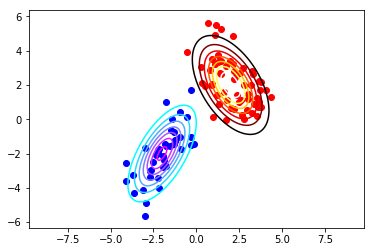

In [5]:
xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

In [6]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X,y)

In [8]:
model_norm.classes
# 종속 변수 y는 0과 1의 라벨을 가진다

array([0., 1.])

In [11]:
model_norm.class_count_
# 종속 변수 y의 라벨 별 표본 데이터의 수이다.

array([40., 60.])

In [12]:
model_norm.class_prior_
# 종속 변수 y의 무조건부 확률이다.  

array([0.4, 0.6])

In [13]:
model_norm.theta_[0] , model_norm.sigma_[0]
# 첫번째 클래스의 독립 변수(가우시안 정규 분포를 띄는) 들의 확률 분포의 모수를 계산한다.

(array([-1.96197643, -2.00597903]), array([1.02398854, 2.31390497]))

In [14]:
model_norm.theta_[1] , model_norm.sigma_[1]

(array([2.19130701, 2.12626716]), array([1.25429371, 1.93742544]))

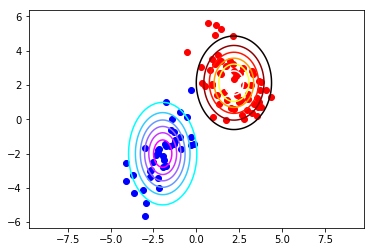

In [15]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

In [16]:
x_new = [-0.7, -0.8]
model_norm.predict_proba([x_new])

array([[0.98300323, 0.01699677]])

### 연습 문제 1
- iris 문제를 GaussianNB를 사용하여 풀어보자

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
dfX = pd.DataFrame(iris.data,columns=iris.feature_names)
dfy = pd.DataFrame(iris.target,columns=['y'])

In [20]:
model_norm = GaussianNB().fit(dfX,dfy)

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.metrics import confusion_matrix , classification_report , roc_curve , auc

In [23]:
# confusion matrix
confusion_matrix(dfy.values , model_norm.predict(dfX))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [24]:
# classification report
print(classification_report(dfy.values , model_norm.predict(dfX)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150



다중 클래스에 대해서는 precision , recall , fall-out 을 그릴 수 없기 때문에 각각의 클래스에 대해 OvR 문제를 가정하여 각각의 OvR 문제에 대해 ROC Curve를 그린다.

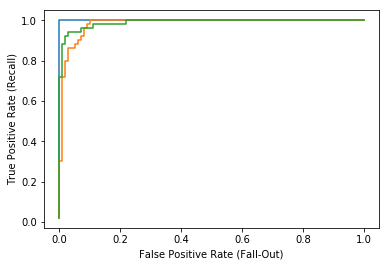

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

## 베르누이 분포 나이브 베이즈 모형

In [26]:
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [27]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X,y)

In [28]:
model_bern.classes_

array([0, 1])

In [29]:
model_bern.class_count_

array([4., 6.])

In [31]:
np.exp(model_bern.class_log_prior_)

array([0.4, 0.6])

In [32]:
fc = model_bern.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [33]:
fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

In [35]:
model_bern.alpha

1.0

In [34]:
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

In [63]:
from sklearn.datasets import load_digits
digits = load_digits()
digit_x = digits.data
digit_y = digits.target
digit_y

array([0, 1, 2, ..., 8, 9, 8])

In [66]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=8.).fit(digit_x)
digit_x = binarizer.transform(digit_x)

In [67]:
model_bern = BernoulliNB().fit(digit_x,digit_y)

In [68]:
confusion_matrix(digit_y , model_bern.predict(digit_x))

array([[171,   0,   0,   0,   1,   3,   2,   0,   0,   1],
       [  0, 146,   8,   0,   0,   1,   3,   0,  13,  11],
       [  1,   8, 156,   3,   0,   0,   0,   1,   4,   4],
       [  0,   2,   2, 155,   0,   2,   0,   7,   5,  10],
       [  0,   3,   0,   0, 168,   1,   1,   5,   3,   0],
       [  0,   0,   1,   2,   2, 166,   0,   0,   0,  11],
       [  1,   5,   0,   0,   2,   0, 171,   0,   2,   0],
       [  0,   0,   2,   0,   0,   0,   0, 175,   1,   1],
       [  0,  15,   7,   1,   0,   5,   0,   2, 139,   5],
       [  0,   0,   0,   3,   0,   3,   0,   8,   4, 162]])

In [69]:
print(classification_report(digit_y,model_bern.predict(digit_x)))

             precision    recall  f1-score   support

          0       0.99      0.96      0.97       178
          1       0.82      0.80      0.81       182
          2       0.89      0.88      0.88       177
          3       0.95      0.85      0.89       183
          4       0.97      0.93      0.95       181
          5       0.92      0.91      0.91       182
          6       0.97      0.94      0.96       181
          7       0.88      0.98      0.93       179
          8       0.81      0.80      0.81       174
          9       0.79      0.90      0.84       180

avg / total       0.90      0.90      0.90      1797



## 다항 분포 나이브 베이즈 모형

In [54]:
X = np.array([    
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [55]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X,y)

In [56]:
model_mult.classes_

array([0, 1])

In [58]:
model_mult.class_count_

array([4., 6.])

In [60]:
np.exp(model_mult.class_log_prior_)

array([0.4, 0.6])

In [61]:
fc = model_mult.feature_count_
fc

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [70]:
digit_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [71]:
digit_y

array([0, 1, 2, ..., 8, 9, 8])

In [72]:
model_mult = MultinomialNB().fit(digit_x,digit_y)

In [73]:
confusion_matrix(digit_y,model_mult.predict(digit_x))

array([[170,   1,   0,   1,   1,   2,   1,   0,   1,   1],
       [  0, 141,   7,   0,   1,   1,   3,   1,  17,  11],
       [  1,  10, 153,   6,   0,   0,   0,   0,   7,   0],
       [  0,   2,   1, 152,   0,   2,   0,   6,   8,  12],
       [  0,   2,   0,   0, 169,   1,   1,   5,   3,   0],
       [  0,   0,   0,   0,   2, 160,   0,   1,   1,  18],
       [  0,   3,   0,   0,   1,   1, 173,   0,   3,   0],
       [  0,   0,   2,   0,   1,   0,   0, 172,   3,   1],
       [  0,  17,   4,   1,   0,   3,   0,   2, 145,   2],
       [  0,   0,   0,   3,   0,   2,   0,  10,   8, 157]])

In [74]:
print(classification_report(digit_y,model_mult.predict(digit_x)))

             precision    recall  f1-score   support

          0       0.99      0.96      0.97       178
          1       0.80      0.77      0.79       182
          2       0.92      0.86      0.89       177
          3       0.93      0.83      0.88       183
          4       0.97      0.93      0.95       181
          5       0.93      0.88      0.90       182
          6       0.97      0.96      0.96       181
          7       0.87      0.96      0.91       179
          8       0.74      0.83      0.78       174
          9       0.78      0.87      0.82       180

avg / total       0.89      0.89      0.89      1797



### 뉴스 그룹 분류

In [76]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset = 'all')
X = news.data
y = news.target

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model1 = Pipeline([
            ('vect', CountVectorizer()), 
            ('model', MultinomialNB()),
         ])
model2 = Pipeline([
            ('vect', TfidfVectorizer()),
            ('model', MultinomialNB()),
         ])
model3 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english")),
            ('model', MultinomialNB()),
         ])
model4 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english", 
                                     token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('model', MultinomialNB()),
         ])

In [79]:
%%time
from sklearn.model_selection import cross_val_score, KFold

for i, model in enumerate([model1, model2, model3, model4]):
    scores = cross_val_score(model, X, y, cv=5)
    print(("Model{0:d}: Mean score: {1:.3f}").format(i, np.mean(scores)))

Model0: Mean score: 0.855
Model1: Mean score: 0.856
Model2: Mean score: 0.883
Model3: Mean score: 0.888
CPU times: user 1min 33s, sys: 1.71 s, total: 1min 34s
Wall time: 1min 15s
